In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np

import sys
import os

sys.path.append(os.environ['REPO_DIR'] + '/utilities')
from utilities2015 import *
from registration_utilities import parallel_where_binary, Aligner4
from metadata import *
from data_manager import *

import matplotlib.pyplot as plt
%matplotlib inline

from joblib import Parallel, delayed
import time

from metadata import *

Setting environment for Gordon


In [57]:
stack_fixed = 'MD591'
# stack_moving = 'MD589'
stack_moving = 'MD594'

In [58]:
paired_structures = ['5N', '6N', '7N', '7n', 'Amb', 'LC', 'LRt', 'Pn', 'Tz', 'VLL', 'RMC', 'SNC', 'SNR', '3N', '4N',
                    'Sp5I', 'Sp5O', 'Sp5C', 'PBG', '10N', 'VCA', 'VCP', 'DC']
singular_structures = ['AP', '12N', 'RtTg', 'SC', 'IC']
structures = paired_structures + singular_structures

In [59]:
label_to_name_fixed = {i+1: name for i, name in enumerate(sorted(structures))}
name_to_label_fixed = {n:l for l, n in label_to_name_fixed.iteritems()}

In [60]:
volume_fixed = {name_to_label_fixed[name]: bp.unpack_ndarray_file(os.path.join(VOLUME_ROOTDIR, '%(stack)s/score_volumes/%(stack)s_down32_scoreVolume_%(name)s.bp' % \
                                                    {'stack': stack_fixed, 'name': name}))
               for name in structures}

print volume_fixed.values()[0].shape

vol_fixed_xmin, vol_fixed_ymin, vol_fixed_zmin = (0,0,0)
vol_fixed_ymax, vol_fixed_xmax, vol_fixed_zmax = np.array(volume_fixed.values()[0].shape) - 1

(410, 500, 375)


In [61]:
label_to_name_moving = {}
name_to_label_moving = {}

with open(os.path.join(VOLUME_ROOTDIR, stack_moving, stack_moving+'_down32_annotationVolume_nameToLabel.txt'), 'r') as f:
    for line in f.readlines():
        name_s, label = line.split()
        label_to_name_moving[int(label)] = name_s
        name_to_label_moving[name_s] = int(label)

In [62]:
volume_moving = bp.unpack_ndarray_file(os.path.join(VOLUME_ROOTDIR, '%(stack)s/%(stack)s_down32_annotationVolume.bp' % {'stack': stack_moving}))

with open(os.path.join(VOLUME_ROOTDIR, stack_moving, stack_moving+'_down32_annotationVolume_bbox.txt'), 'r') as f:
    vol_moving_xmin, vol_moving_xmax, vol_moving_ymin, vol_moving_ymax, vol_moving_zmin, vol_moving_zmax = map(int, f.readline().strip().split())

In [63]:
labelIndexMap_m2f = {}
for label_m, name_m in label_to_name_moving.iteritems():
    labelIndexMap_m2f[label_m] = name_to_label_fixed[convert_name_to_unsided(name_m)]

In [64]:
# aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f={44:25, 45:25})

In [65]:
aligner = Aligner4(volume_fixed, volume_moving, labelIndexMap_m2f=labelIndexMap_m2f)

In [66]:
aligner.set_centroid(centroid_m='volume_centroid', centroid_f='volume_centroid')
# aligner.set_centroid(centroid_m='structure_centroid', centroid_f='centroid_m', indices_m=[name_to_label_moving['SNR_R']])

In [67]:
gradient_filepath_map_f = {ind_f: VOLUME_ROOTDIR + '/%(stack)s/score_volume_gradients/%(stack)s_down32_scoreVolume_%(label)s_%%(suffix)s.bp' % \
                           {'stack': stack_fixed, 'label': label_to_name_fixed[ind_f]}
                           for ind_m, ind_f in labelIndexMap_m2f.iteritems()}

In [68]:
aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=None)

set([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28])


load gradient 1: 2.530444 seconds
load gradient 2: 2.445489 seconds
load gradient 3: 2.309690 seconds
load gradient 4: 2.229706 seconds
load gradient 5: 2.219658 seconds
load gradient 6: 2.218512 seconds
load gradient 7: 2.237160 seconds
load gradient 8: 2.346877 seconds
load gradient 9: 2.343526 seconds
load gradient 10: 2.202215 seconds
load gradient 11: 2.347023 seconds
load gradient 12: 2.328306 seconds
load gradient 13: 2.200857 seconds
load gradient 14: 2.344579 seconds
load gradient 15: 2.283234 seconds
load gradient 16: 2.459663 seconds
load gradient 17: 2.315236 seconds
load gradient 18: 2.615236 seconds
load gradient 19: 2.505920 seconds
load gradient 20: 2.536257 seconds
load gradient 21: 2.456210 seconds
load gradient 22: 2.516185 seconds
load gradient 23: 2.418857 seconds
load gradient 24: 2.700638 seconds
load gradient 25: 2.240073 seconds
load gradient 26: 2.397442 seconds
load gradient 27: 2.227126 seconds
load gradient 28: 2.513554 seconds
overall: 66.494061 seconds


In [ ]:
# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=[name_to_label_fixed['5N_L'],
#                                                                                  name_to_label_fixed['5N_R'],
#                                                                                  name_to_label_fixed['12N'],
#                                                                                   name_to_label_fixed['SNR_L'],
#                                        name_to_label_fixed['SNR_R']])

In [ ]:
# aligner.load_gradient(gradient_filepath_map_f=gradient_filepath_map_f, indices_f=[name_to_label_fixed['SNR_L']])

In [ ]:
# T, scores = aligner.optimize(type='rigid', max_iter_num=10, history_len=500, terminate_thresh=1e-4,
#                              grid_search_sample_number=1000,
#                              indices_m=None)

In [ ]:
# T, scores = aligner.optimize(type='rigid', max_iter_num=20, history_len=500, terminate_thresh=1e-4,
#                              indices_m=[name_to_label_moving['5N_L'],
#                                         name_to_label_moving['5N_R'],
#                                        name_to_label_fixed['12N'],
#                                        name_to_label_fixed['SNR_L'],
#                                        name_to_label_fixed['SNR_R']])

In [69]:
# largely the same optimization path regardless of the starting condition

# For rigid, 
# grad_computation_sample_number = 1e5 is desired
# grid_search_iteration_number and grid_search_sample_number seem to be unimportant as well, set to 100
# lr1=10, lr2=.1 is best

# For affine, 
# lr2 = .001 is too slow; 0.1 rises faster than 0.01
# lr1 does not matter
# plateus around iteration 100, but keep rising afterwards.
# grad_computation_sample_number does not make a difference

T, scores = aligner.optimize(type='rigid', max_iter_num=1000, history_len=100, terminate_thresh=1e-3,
#                              indices_m=[name_to_label_fixed['SNR_L']],
                             indices_m=None,
                            grid_search_iteration_number=10,
                             grid_search_sample_number=100,
                             grad_computation_sample_number=1e5,
                             lr1=10., lr2=.1)
#                              init_T=[1,0,0,53,0,1,0,15,0,0,1,0])

No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid v

[[  0.95527312  -0.26235146   0.13647335  43.15382143]
 [  0.27677297   0.95570596  -0.10011417  24.82186819]
 [ -0.10416329   0.13340851   0.98557201 -14.5078276 ]]
0.369529 0.365376


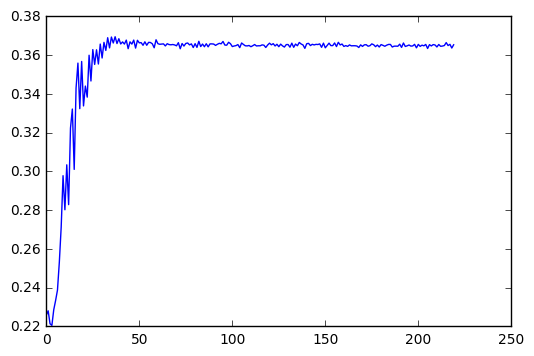

In [71]:
print T.reshape((3,4))
plt.plot(scores);
print max(scores), scores[-1]

In [72]:
atlasAlignParams_dir = create_if_not_exists(atlasAlignParams_rootdir + '/%(stack_moving)s_to_%(stack_fixed)s' % \
                     {'stack_moving': stack_moving, 'stack_fixed': stack_fixed})

In [73]:
with open(atlasAlignParams_dir + '/%(stack_moving)s_down32_annotationVolume_to_%(stack_fixed)s_down32_scoreVolume_parameters.txt' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed}, 'w') as f:
    
    f.write(array_to_one_liner(T))
    f.write(array_to_one_liner(aligner.centroid_m))
    f.write(array_to_one_liner([aligner.xdim_m, aligner.ydim_m, aligner.zdim_m]))
    f.write(array_to_one_liner(aligner.centroid_f))
    f.write(array_to_one_liner([aligner.xdim_f, aligner.ydim_f, aligner.zdim_f]))

In [ ]:
# Try all sets of parameters 

grid search: 2.804557 seconds
0.000000 1.468269
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transform.
No valid voxels after transf

NameError: name 'atlasAlignParams_dir' is not defined

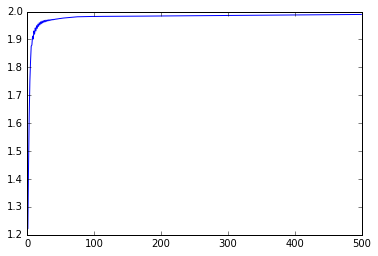

In [13]:
c = 0

for lr1 in [.1, 1., 10.]:
    for lr2 in [1e-1, 1e-2, 1e-3]:
        for n in [1e3, 1e4, 1e5]:
            
            
            c += 1
        
            T, scores = aligner.optimize(type='affine', max_iter_num=500, history_len=500, terminate_thresh=1e-4,
            #                              indices_m=[name_to_label_fixed['SNR_L']],
                                         indices_m=None,
                                        grid_search_iteration_number=10,
                                         grid_search_sample_number=100,
                                         grad_computation_sample_number=n,
                                         lr1=lr1, lr2=lr2)
            #                              init_T=[1,0,0,-10,0,1,0,0,0,0,1,0])
            
            plt.figure();
            plt.plot(scores);
            plt.savefig(atlasAlignParams_dir + '/affine/%(stack_moving)s_to_%(stack_fixed)s_scoreEvolution_%(c)d.png' % \
                        {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'c':c},
                        bbox_inches='tight')
            
            with open(atlasAlignParams_dir + '/affine/%(stack_moving)s_to_%(stack_fixed)s_scoreEvolution_%(c)d.txt' % \
                       {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'c':c}, 'w') as f:
                f.write(array_to_one_liner([lr1, lr2, n]))
#             print max(scores), scores[-1]

In [13]:
c = 0
for lr1 in [.1, 1., 10.]:
    for lr2 in [1e-1, 1e-2, 1e-3]:
        for n in [1e3, 1e4, 1e5]:
            c += 1
            print c, lr1, lr2, int(n)

1 0.1 0.1 1000
2 0.1 0.1 10000
3 0.1 0.1 100000
4 0.1 0.01 1000
5 0.1 0.01 10000
6 0.1 0.01 100000
7 0.1 0.001 1000
8 0.1 0.001 10000
9 0.1 0.001 100000
10 1.0 0.1 1000
11 1.0 0.1 10000
12 1.0 0.1 100000
13 1.0 0.01 1000
14 1.0 0.01 10000
15 1.0 0.01 100000
16 1.0 0.001 1000
17 1.0 0.001 10000
18 1.0 0.001 100000
19 10.0 0.1 1000
20 10.0 0.1 10000
21 10.0 0.1 100000
22 10.0 0.01 1000
23 10.0 0.01 10000
24 10.0 0.01 100000
25 10.0 0.001 1000
26 10.0 0.001 10000
27 10.0 0.001 100000


In [ ]:
# READ

In [ ]:
# stack_fixed = 'MD589'
# stack_moving = 'MD594'

In [74]:
atlasAlignParams_dir = create_if_not_exists(atlasAlignParams_rootdir + '/%(stack_moving)s_to_%(stack_fixed)s' % \
                     {'stack_moving': stack_moving, 'stack_fixed': stack_fixed})

In [75]:
# volume_fixed = bp.unpack_ndarray_file(os.path.join(VOLUME_ROOTDIR, '%(stack)s/%(stack)s_down32_annotationVolume.bp' % {'stack': stack_fixed}))
volume_moving = bp.unpack_ndarray_file(os.path.join(VOLUME_ROOTDIR, '%(stack)s/%(stack)s_down32_annotationVolume.bp' % {'stack': stack_moving}))
# print volume_fixed.shape
print volume_moving.shape

(326, 515, 368)


In [76]:
with open(atlasAlignParams_dir + '/%(stack_moving)s_down32_annotationVolume_to_%(stack_fixed)s_down32_scoreVolume_parameters.txt' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed}, 'r') as f:
    
    lines = f.readlines()
    
    global_params = one_liner_to_arr(lines[0], float)
    centroid_m = one_liner_to_arr(lines[1], float)
    xdim_m, ydim_m, zdim_m  = one_liner_to_arr(lines[2], int)
    centroid_f = one_liner_to_arr(lines[3], float)
    xdim_f, ydim_f, zdim_f  = one_liner_to_arr(lines[4], int)

In [77]:
all_indices_m = set(np.unique(volume_moving)) - {0}

In [78]:
nzvoxels_m = {i: parallel_where_binary(volume_moving==i) for i in all_indices_m}

In [154]:
# HANGS for some reason
# from multiprocessing import Pool

# pool = Pool(2)
# # nzvoxels_m_ = pool.map(lambda i: parallel_where_binary(volume_m[i] > 0, num_samples=int(1e6)),
# #                         self.all_indices_m)
# nzvoxels_m = pool.map(lambda i: parallel_where_binary(volume_moving==i),
#                         all_indices_m)
# pool.close()
# pool.join()

# nzvoxels_m = dict(zip(all_indices_m, nzvoxels_m))

In [79]:
from registration_utilities import transform_points

In [80]:
nzs_m_aligned_to_f = {ind_m: transform_points(global_params, pts=nzs_m, 
                                              c=centroid_m, c_prime=centroid_f).astype(np.int16)
                      for ind_m, nzs_m in nzvoxels_m.iteritems()}

volume_m_aligned_to_f = np.zeros((ydim_f, xdim_f, zdim_f), np.int)

for ind_m in nzs_m_aligned_to_f.iterkeys():

    xs_f, ys_f, zs_f = nzs_m_aligned_to_f[ind_m].T
    
    valid = (xs_f >= 0) & (ys_f >= 0) & (zs_f >= 0) & \
    (xs_f < xdim_f) & (ys_f < ydim_f) & (zs_f < zdim_f)

    xs_m, ys_m, zs_m = nzvoxels_m[ind_m].T
    
    volume_m_aligned_to_f[ys_f[valid], xs_f[valid], zs_f[valid]] = \
    volume_moving[ys_m[valid], xs_m[valid], zs_m[valid]]

del nzs_m_aligned_to_f

In [81]:
# with open('/home/yuncong/csd395/CSHL_volumes2/%(stack_moving)s/%(stack_moving)s_down32_annotationVolume_bbox.txt' %\
#           dict(stack_moving=stack_moving), 'r') as f:
#     xmin_vol_m, xmax_vol_m, ymin_vol_m, ymax_vol_m, zmin_vol_m, zmax_vol_m = map(int, f.readline().strip().split())
#     print xmin_vol_m, xmax_vol_m, ymin_vol_m, ymax_vol_m, zmin_vol_m, zmax_vol_m

In [82]:
xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f = np.loadtxt('/home/yuncong/csd395/CSHL_volumes2/%(stack_fixed)s/score_volumes/%(stack_fixed)s_down32_scoreVolume_7N_bbox.txt' %\
          dict(stack_fixed=stack_fixed)).astype(np.int)
print xmin_vol_f, xmax_vol_f, ymin_vol_f, ymax_vol_f, zmin_vol_f, zmax_vol_f

0 499 0 409 131 505


In [83]:
# with open('/home/yuncong/CSHL_data_processed/%(stack_fixed)s/%(stack_fixed)s_cropbox.txt' %\
#           dict(stack_fixed=stack_fixed), 'r') as f:
#     xmin, xmax, ymin, ymax, sec_min, sec_max = map(int, f.readline().strip().split())
#     print xmin, xmax, ymin, ymax, sec_min, sec_max

In [84]:
# volume_tb_fixed = bp.unpack_ndarray_file('/home/yuncong/csd395/CSHL_volumes2/%(stack_fixed)s/%(stack_fixed)s_down32Volume.bp' % dict(stack_fixed=stack_fixed))

In [85]:
from registration_utilities import find_contour_points

In [86]:
downsample_factor = 32
xy_pixel_distance_downsampled = xy_pixel_distance_lossless * downsample_factor
voxel_z_size = section_thickness / xy_pixel_distance_downsampled

In [87]:
create_if_not_exists(os.path.join(atlasAlignParams_dir, 'viz'))

'/oasis/projects/nsf/csd395/yuncong/CSHL_atlasAlignParams_atlas_v2/MD594_to_MD591/viz'

In [89]:
first_sec, last_sec = metadata_cache['section_limits'][stack_fixed]

In [90]:
bar = show_progress_bar(first_sec, last_sec)

for sec in range(first_sec, last_sec+1):
    
    if metadata_cache['sections_to_filenames'][stack_fixed][sec] in ['Placeholder', 'Rescan', 'Nonexisting']:
        continue
    
    bar.value = sec

    z = voxel_z_size * (sec - 1) - zmin_vol_f

#     contours_f_on_volume = find_contour_points(volume_fixed[..., int(z)])
#     contours_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] for i, cnts in contours_f_on_volume.iteritems()}

    contours_m_alignedTo_f_on_volume = find_contour_points(volume_m_aligned_to_f[..., int(z)])
    contours_m_alignedTo_f_on_cropped = {i: [cnt + (xmin_vol_f, ymin_vol_f) for cnt in cnts] for i, cnts in contours_m_alignedTo_f_on_volume.iteritems()}

#     img = imread('/home/yuncong/CSHL_data_processed/%(stack_fixed)s/%(stack_fixed)s_thumbnail_sorted_aligned/%(stack_fixed)s_%(sec)04d_thumbnail_aligned.tif' %\
#                dict(stack_fixed=stack_fixed, sec=sec))

    img_fn = DataManager.get_image_filepath(stack=stack_fixed, section=sec, resol='thumbnail', version='cropped_tif')
    img = imread(img_fn)

    viz = img.copy()

    for ind_m, cnts_m in contours_m_alignedTo_f_on_cropped.iteritems():
        for cnt_m in cnts_m:
            cv2.polylines(viz, [cnt_m.astype(np.int)], True, (255,0,0), 2)

#     for ind_f, cnts_f in contours_f_on_cropped.iteritems():
#         for cnt_f in cnts_f:
#             cv2.polylines(viz, [cnt_f.astype(np.int)], True, (0,255,0), 2)


#     plt.figure(figsize=(20,20));
#     plt.imshow(viz[:800, :1200])
#     plt.show();
    
    viz_fn = os.path.join(atlasAlignParams_dir, 'viz', '%(stack_moving)s_to_%(stack_fixed)s_%(sec)04d.jpg' % \
          {'stack_moving': stack_moving, 'stack_fixed': stack_fixed, 'sec': sec})
    imsave(viz_fn, viz)

In [ ]:
volume_m_alignedTo_f_fn = os.path.join(atlasAlignParams_dir, '%(stack_moving)s_down32_annotationVolume_alignedTo_%(stack_fixed)s_down32_annotationVolume.bp' % \
                                       {'stack_moving': stack_moving, 'stack_fixed': stack_fixed})

In [ ]:
from annotation_utilities import fill_sparse_volume
volume_m_aligned_to_f_densified = fill_sparse_volume(volume_m_aligned_to_f)

In [ ]:
bp.pack_ndarray_file(volume_m_aligned_to_f_densified, volume_m_alignedTo_f_fn)